### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5
#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Легиньких Галина
##### Группа:   НФИбд-02-21

##### Москва 2024
***

### Вариант № 6 (Wine Data Set) 
Название файла: wine.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Wine 

Класс: cultivar (столбец No 1) 

Метод отбора признаков – рекурсивное исключение признаков (RFE) 

Модели классификации: 

наивный байесовский классификатор 

классификатор логистической регрессии    

классификатор логистической регрессии с полиномиальной зависимостью (degree=2) 

Кривая для визуализации - PR-кривая 

## Выполнение

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

Считала заданный набор данных.

In [20]:
import pandas as pd

url = \
    "https://archive.ics.uci.edu/ml/"+\
    "machine-learning-databases/wine/wine.data"

wine = pd.read_csv(url, header=None)
wine.columns = ['Cultivar', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',  'Magnesium', 'Total phenols', 
				'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',  'Color intensity', 'Hue',
				'OD280/OD315 of diluted wines', 'Proline']
wine.head(10)

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс. 

Среди меток класса нет пропущенных значений. Среди признаков тоже.

In [21]:
import numpy as np

wine = wine.replace('?', np.NaN) # заменим '?' на np.NaN

print('Число пропущенных значений:')
for col in wine.columns:
    print("NaN in", col,"=", wine[col].isna().sum())

Число пропущенных значений:
NaN in Cultivar = 0
NaN in Alcohol = 0
NaN in Malic acid = 0
NaN in Ash = 0
NaN in Alcalinity of ash = 0
NaN in Magnesium = 0
NaN in Total phenols = 0
NaN in Flavanoids = 0
NaN in Nonflavanoid phenols = 0
NaN in Proanthocyanins = 0
NaN in Color intensity = 0
NaN in Hue = 0
NaN in OD280/OD315 of diluted wines = 0
NaN in Proline = 0


Столбец с меткой класса содержит более двух классов.

In [22]:
len(wine['Cultivar'].unique())

3

Посмотрим сколько в каждом классе значений.

In [23]:
wine['Cultivar'].value_counts()

Cultivar
2    71
1    59
3    48
Name: count, dtype: int64

Класс 2 является преобладающим (мажоритарным), а классы 1 и 3 можно объединить в один новый класс для достижения бинарной классификации. Теперь объединим классы 1 и 3 в новый класс, скажем, "0", а класс 2 останется как "1".

In [24]:
wine['Cultivar'] = wine['Cultivar'].apply(lambda x: 1 if x == 2 else 0)
wine['Cultivar'].value_counts()

Cultivar
0    107
1     71
Name: count, dtype: int64

3. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов. 

Все признаки числовые. И прознаков нет пустых значений, это проверено выше.

In [25]:
wine.dtypes

Cultivar                          int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

4. Выполните стандартизацию признаков набора данных.

Выполнила стандартизацию признаков.

In [26]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',  'Magnesium', 'Total phenols', 
				'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',  'Color intensity', 'Hue',
				'OD280/OD315 of diluted wines', 'Proline']
scaler = StandardScaler().fit(wine[columns_to_standardize])
wine[columns_to_standardize] = scaler.transform(wine[columns_to_standardize])
wine.head()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,0,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


4.  Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений. 

У меня это метод рекурсивного исключения признаков (RFE).

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = wine.drop(columns='Cultivar')
X = X.loc[:, X.nunique() > 10]
Y = wine['Cultivar']

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=2)
fit = rfe.fit(X, Y)

Выбранные признаки: ['Color intensity', 'Proline']

In [28]:
print("Число признаков: %d" % fit.n_features_)
print("Выбранные признаки: %s" % fit.support_)
selected_X = X.columns[rfe.support_]
print("Выбранные признаки:", selected_X)
print("Ранг признаков: %s" % fit.ranking_)

Число признаков: 2
Выбранные признаки: [False False False False False False False False False  True False False
  True]
Выбранные признаки: Index(['Color intensity', 'Proline'], dtype='object')
Ранг признаков: [ 2  6  4  5 10 12  7  8  9  1  3 11  1]


На всякий случай еще раз проверю на количество уникальных значений.

In [29]:
print('Color intensity -', len(wine['Color intensity'].value_counts())) # > 10
print('Proline -', len(wine['Proline'].value_counts())) # > 10

Color intensity - 132
Proline - 121


In [30]:
wine_new = wine[['Cultivar', 'Proline', 'Color intensity']]
wine_new.head()

,Cultivar,Proline,Color intensity
0,0,1.013009,0.251717
1,0,0.965242,-0.293321
2,0,1.395148,0.269020
3,0,2.334574,1.186068
4,0,-0.037874,-0.319276


6. Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных. 

Пусть класс 1 будет -, а класс 0 будет +.

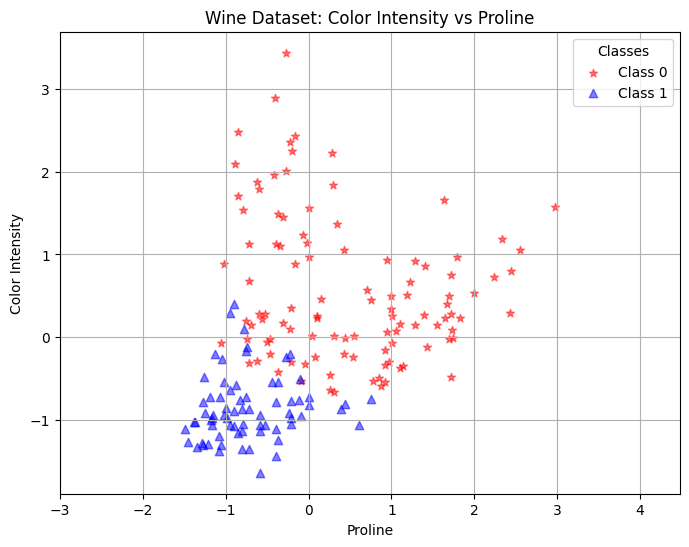

In [31]:
import matplotlib.pyplot as plt

# Настройки для визуализации
plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'blue'}  
markers = {0: '*', 1: '^'}  

for clr in wine_new['Cultivar'].unique():
    xx = wine_new['Proline'].loc[wine_new['Cultivar'] == clr] 
    yy = wine_new['Color intensity'].loc[wine_new['Cultivar'] == clr] 
    plt.scatter(xx, yy, c=colors[clr], label=f'Class {clr}', 
                marker=markers[clr], alpha=0.5)

# Настройки графика
plt.axis('equal')
plt.title('Wine Dataset: Color Intensity vs Proline')
plt.xlabel('Proline')
plt.ylabel('Color Intensity')
plt.legend(title='Classes')
plt.grid()
plt.show()


7. Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 

Модели классификации: 

наивный байесовский классификатор 

классификатор логистической регрессии    

классификатор логистической регрессии с полиномиальной зависимостью (degree=2) 

In [32]:
from sklearn.model_selection import train_test_split

X = wine_new[['Proline', 'Color intensity']]
Y = wine_new['Cultivar']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((124, 2), (124,), (54, 2), (54,))

#### Наивный байесовский классификатор 

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  
y_pred_nb = nb_model.predict(X_test) 
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Наивный байесовский классификатор accuracy: {nb_accuracy:.2f}')

Наивный байесовский классификатор accuracy: 0.91


#### Классификатор логистической регрессии

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log)
print(f'Логистическая регрессия accuracy: {log_reg_accuracy:.2f}')

Логистическая регрессия accuracy: 0.93


#### Классификатор логистической регрессии с полиномиальной зависимостью (degree=2)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(max_iter=1000))
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
poly_accuracy = accuracy_score(y_test, y_pred_poly)
print(f'Логистическая регрессия с полиномиальной зависимостью accuracy: {poly_accuracy:.2f}')

Логистическая регрессия с полиномиальной зависимостью accuracy: 0.91


8. Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6. 

C:\Users\galin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


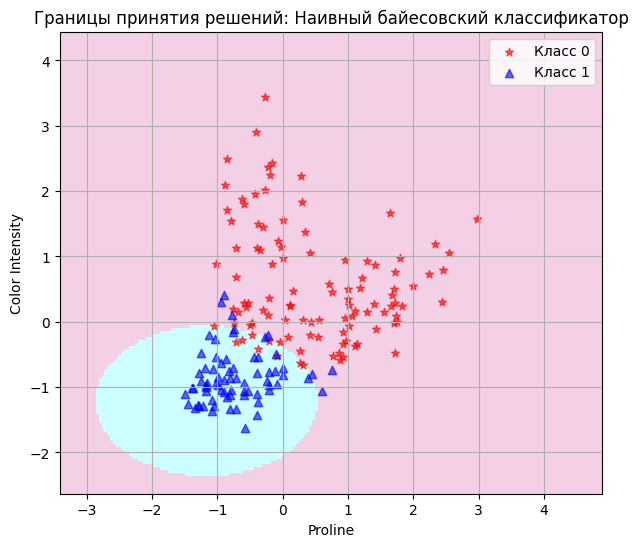

C:\Users\galin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


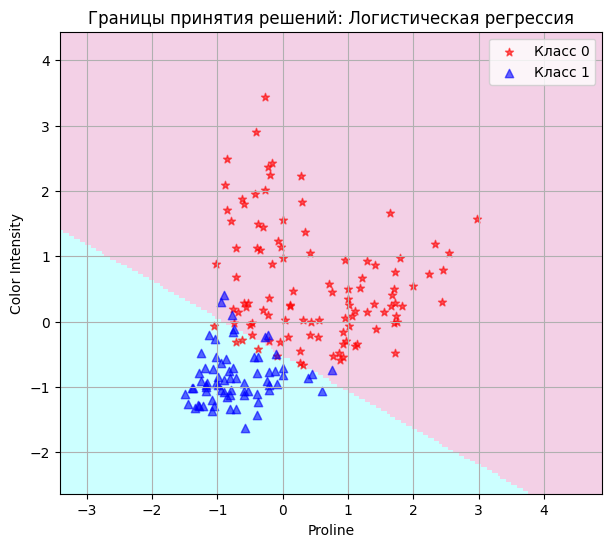

C:\Users\galin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


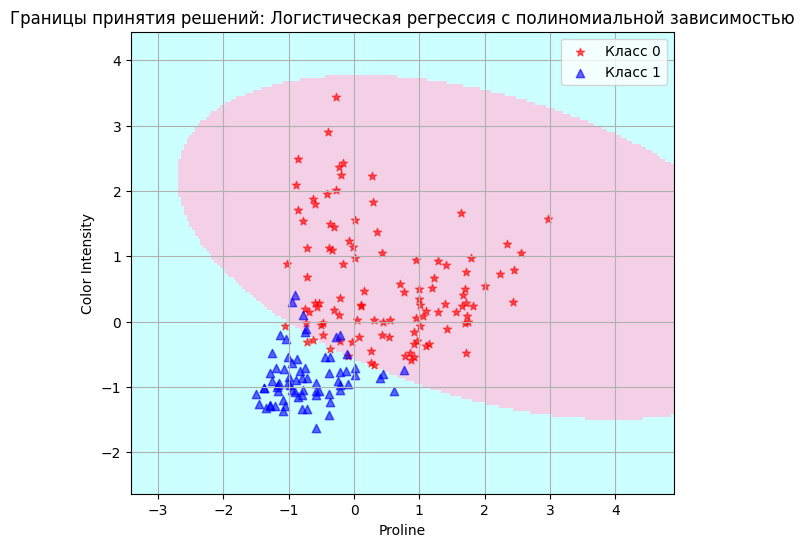

In [36]:
from matplotlib.colors import ListedColormap

classifiers = {
    'Наивный байесовский классификатор': GaussianNB(),
    'Логистическая регрессия': LogisticRegression(),
    'Логистическая регрессия с полиномиальной зависимостью': make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(max_iter=1000))
}

# Обучение классификаторов
for clf in classifiers.values():
    clf.fit(X_train, y_train)

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(np.linspace(axis[0], axis[1], 200),
                         np.linspace(axis[2], axis[3], 200))
    zz = model.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

    plt.imshow(zz, interpolation="nearest", extent=axis, aspect="auto", origin="lower", 
               cmap=ListedColormap(['#C71585', '#00FFFF']), alpha=0.2)

# Визуализация для каждого классификатора
for name, clf in classifiers.items():
    plt.figure(figsize=(7, 6))
    
    plot_decision_boundary(clf, axis=[X['Proline'].min() - 2, X['Proline'].max() + 2, 
                                       X['Color intensity'].min() - 2, X['Color intensity'].max() + 2])
    
    plt.scatter(X[Y == 0]['Proline'], X[Y == 0]['Color intensity'], 
                marker='*', color='red', label='Класс 0', alpha=0.6)
    plt.scatter(X[Y == 1]['Proline'], X[Y == 1]['Color intensity'], 
                marker='^', color='blue', label='Класс 1', alpha=0.6)
    
    # Настройки графика
    plt.title(f'Границы принятия решений: {name}')
    plt.xlabel('Proline')
    plt.ylabel('Color Intensity')
    plt.axis('equal')
    plt.xlim(X['Proline'].min() - 1, X['Proline'].max() + 1)
    plt.ylim(X['Color intensity'].min() - 1, X['Color intensity'].max() + 1)
    plt.legend()
    plt.grid(True)
    plt.show()

9. Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов. 

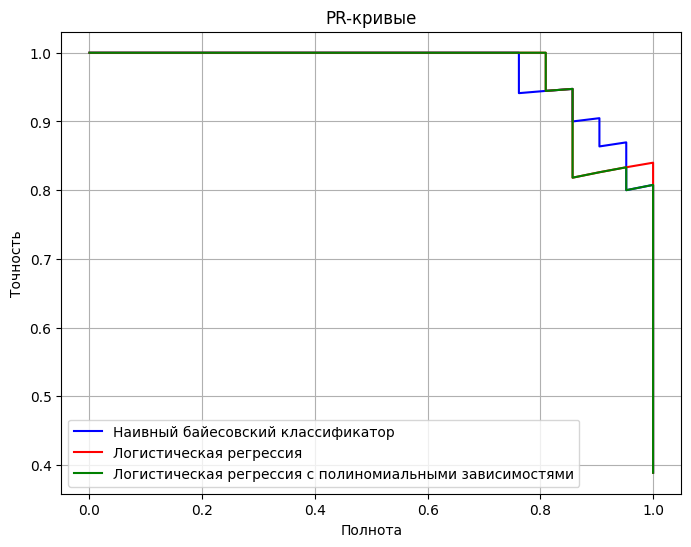

In [37]:
from sklearn.metrics import precision_recall_curve, auc

# Вычисление PR-кривых
precision_nbc, recall_nbc, _ = precision_recall_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
precision_log_reg_poly, recall_log_reg_poly, _ = precision_recall_curve(y_test, poly_model.predict_proba(X_test)[:, 1])

# Построение
plt.figure(figsize=(8, 6))
plt.plot(recall_nbc, precision_nbc, label='Наивный байесовский классификатор', c='b')
plt.plot(recall_log_reg, precision_log_reg, label='Логистическая регрессия', c='r')
plt.plot(recall_log_reg_poly, precision_log_reg_poly, label='Логистическая регрессия с полиномиальными зависимостями', c='g')

# Настройки графика
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('PR-кривые')
plt.legend(loc='lower left')
plt.grid()
plt.show()


10. Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9. 

Как видно, наивный бфйесовкий классификатор считается лучшим из рассмотренных.

In [38]:
area_nbc = auc(recall_nbc, precision_nbc)
area_log_reg = auc(recall_log_reg, precision_log_reg)
area_log_reg_poly = auc(recall_log_reg_poly, precision_log_reg_poly)

# Вывод площадей под PR-кривой
print(f'Площадь под PR-кривой для Наивного байесовского классификатора: {area_nbc:.4f}')
print(f'Площадь под PR-кривой для Логистической регрессии: {area_log_reg:.4f}')
print(f'Площадь под PR-кривой для Логистической регрессии с полиномиальными зависимостями: {area_log_reg_poly:.4f}')

areas = {
    'Наивный байесовский классификатор': area_nbc,
    'Логистическая регрессия': area_log_reg,
    'Логистическая регрессия с полиномиальными зависимостями': area_log_reg_poly
}

best_classifier = max(areas, key=areas.get)
print(f'Лучший классификатор: {best_classifier} с площадью {areas[best_classifier]:.4f}')

Площадь под PR-кривой для Наивного байесовского классификатора: 0.9744
Площадь под PR-кривой для Логистической регрессии: 0.9731
Площадь под PR-кривой для Логистической регрессии с полиномиальными зависимостями: 0.9715
Лучший классификатор: Наивный байесовский классификатор с площадью 0.9744
